In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Reading the dataset
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df['fuel'].value_counts()
#df.owner.unique()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [4]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [5]:
df['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [6]:
df['name'].value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [7]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [8]:
df.shape


(4340, 8)

In [9]:
#1) Handle Null Values

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
#2) Handle Duplicates
df.duplicated().sum()


763

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [13]:
#Separate Num an Cat features
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [14]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


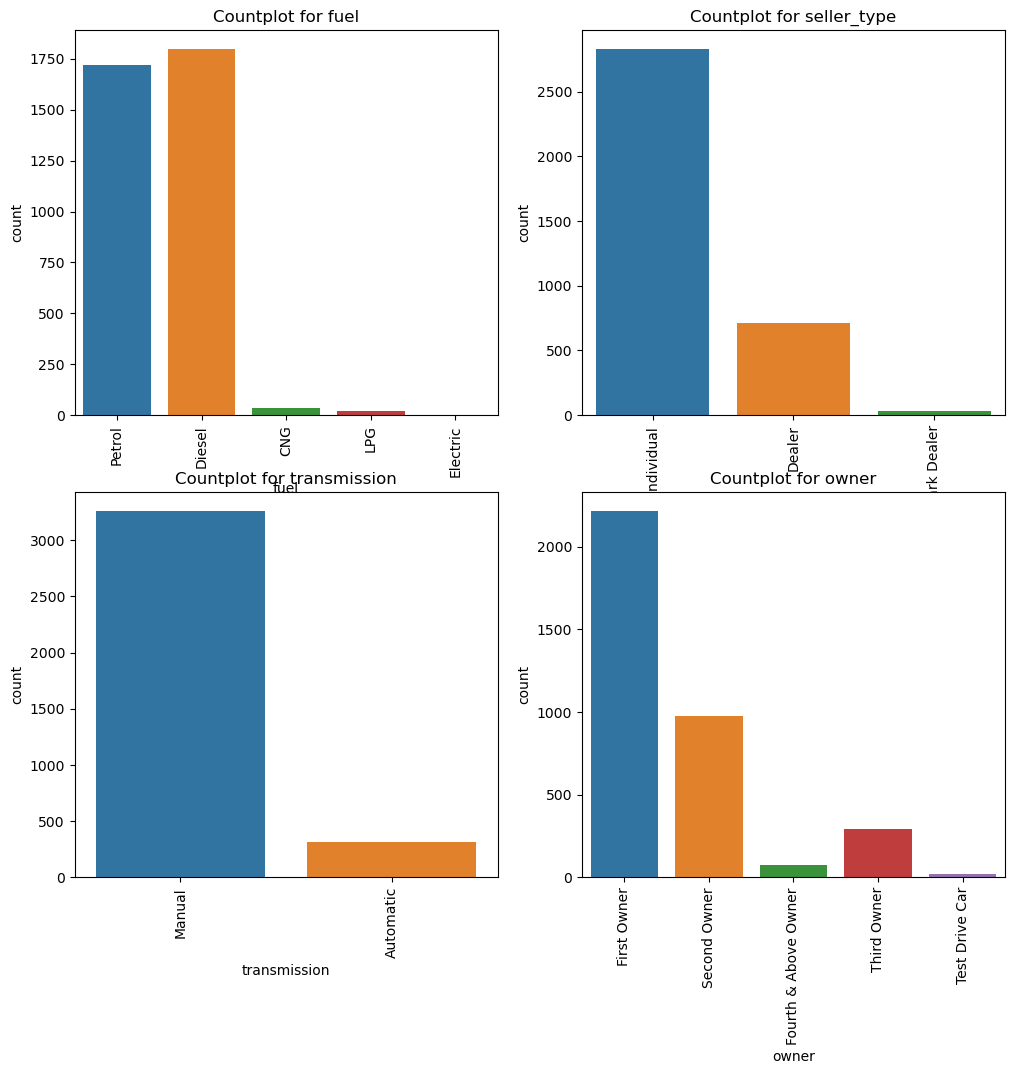

In [15]:

#EDA
cols = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(12,11))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f'Countplot for {cols[i]}')
    plt.xticks(rotation=90)
plt.show()




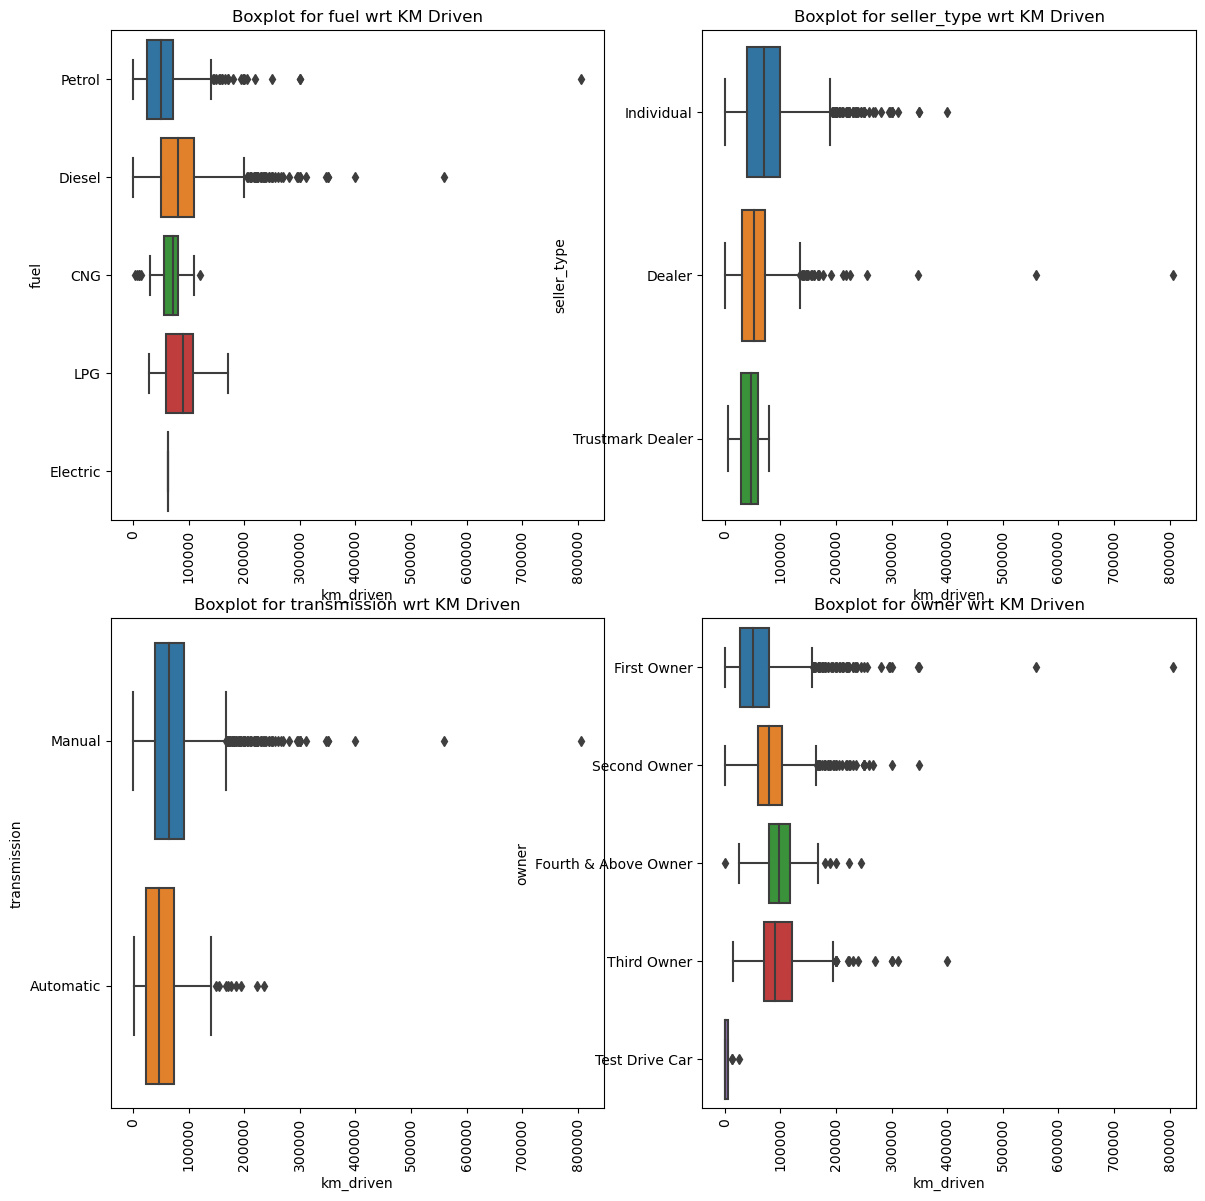

In [16]:
cols = ['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(14,14))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x =df['km_driven'], y=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]} wrt KM Driven')
    plt.xticks(rotation=90)
plt.show()




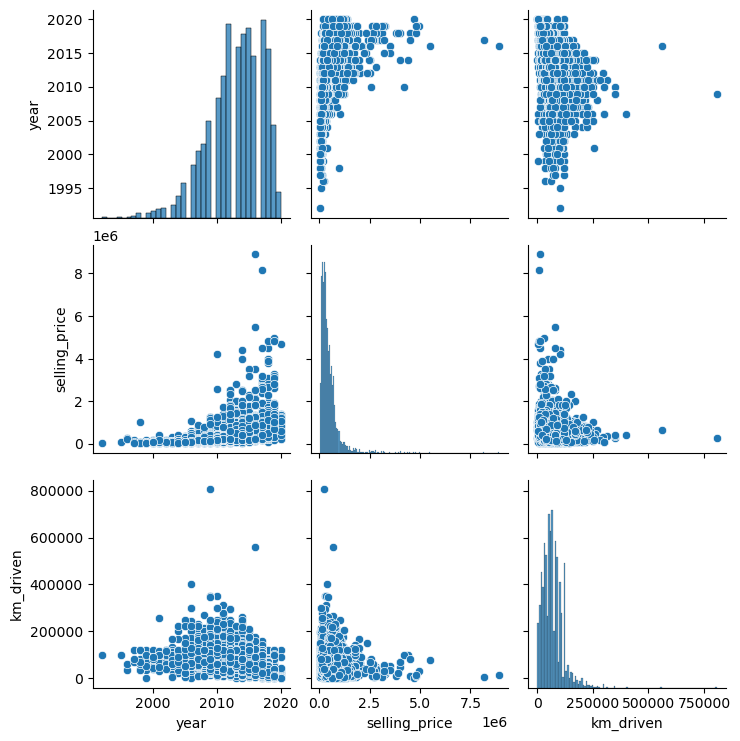

In [17]:

# Pairplot for numerical features
sns.pairplot(df[num_cols])
plt.show()



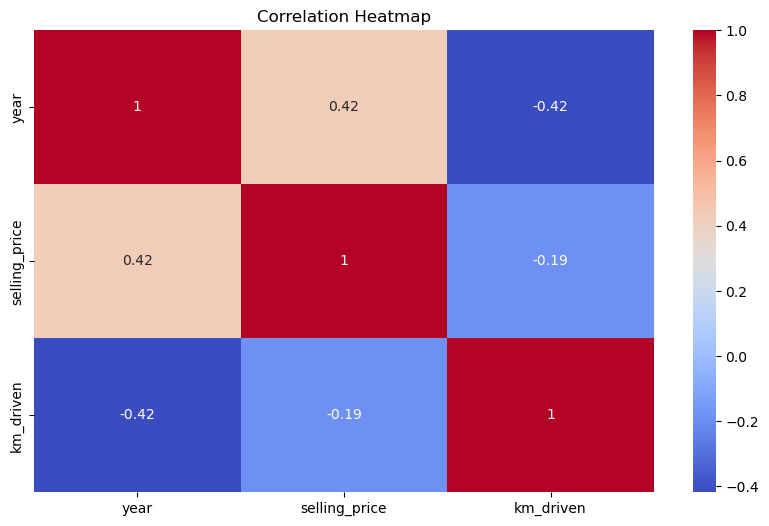

In [18]:
# Correlation heatmap for numerical features
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

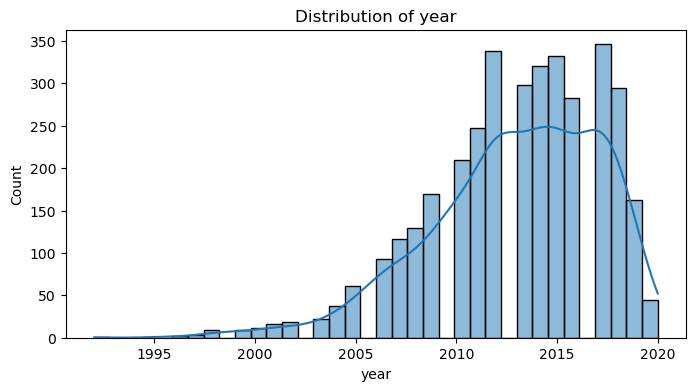

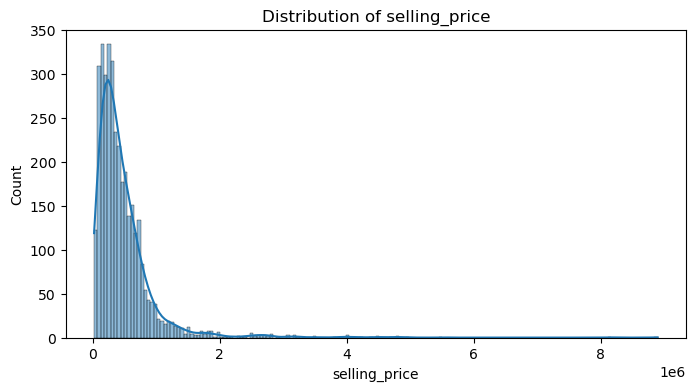

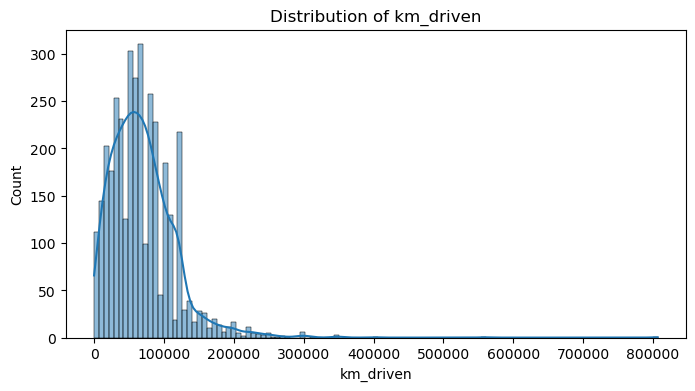

In [19]:

# Distribution of numerical features
for column in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

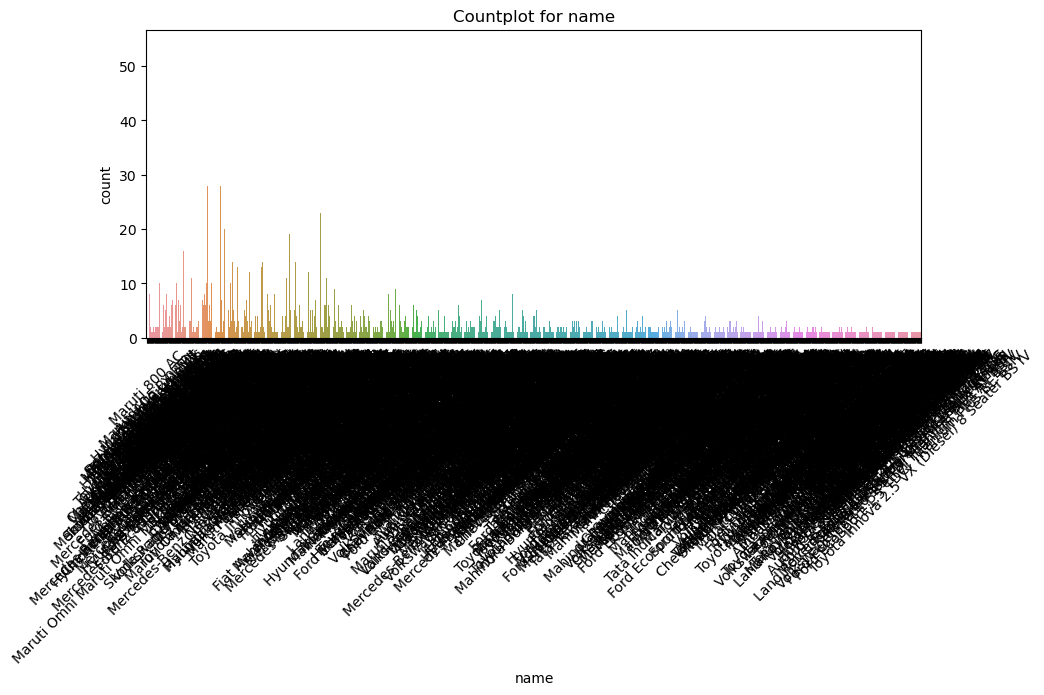

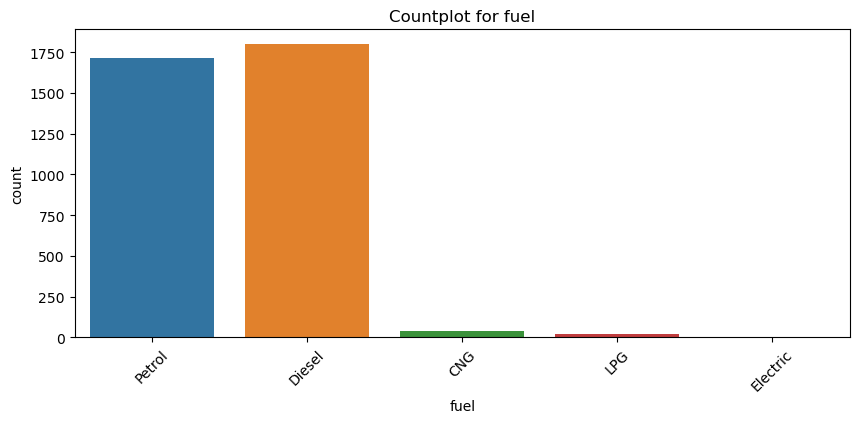

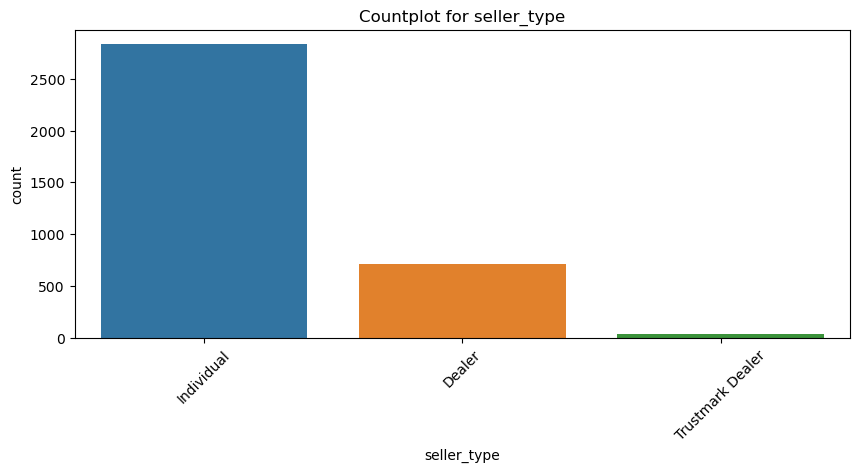

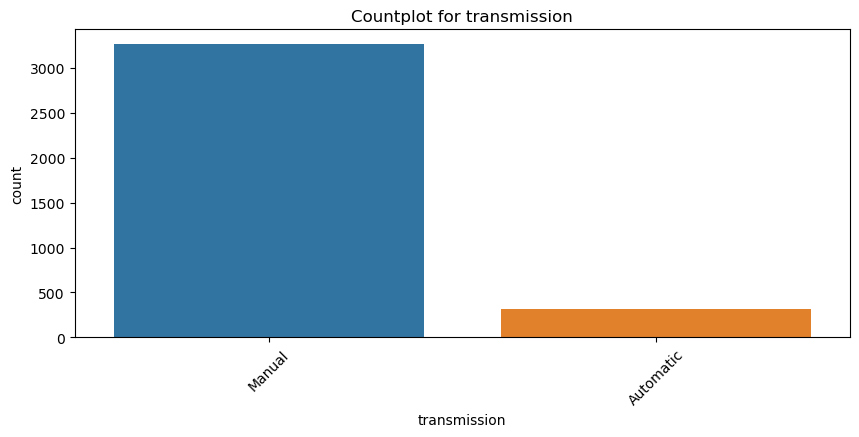

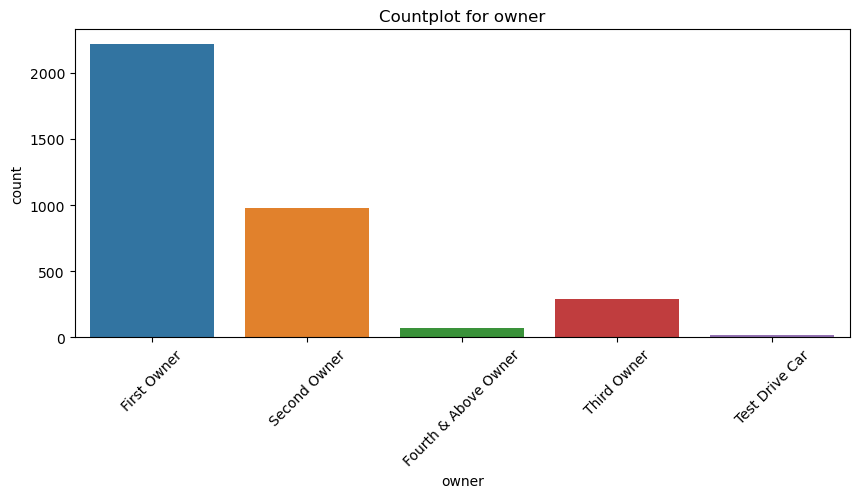

In [20]:
# Countplots for categorical features
for column in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[column], data=df)
    plt.title(f'Countplot for {column}')
    plt.xticks(rotation=45)
    plt.show()

In [21]:
#Outlier treatment¶
a = df[['year','selling_price']].describe(percentiles = [0.01,0.02,0.05,0.95,0.98,0.99]).T

a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,98%,99%,max
year,1992.0,2000.00,2003.0,2005.0,2013.0,2019.0,2019.0,2020.0,2020.0
selling_price,20000.0,51786.64,60000.0,80000.0,350000.0,1200000.0,1800000.0,2675000.0,8900000.0


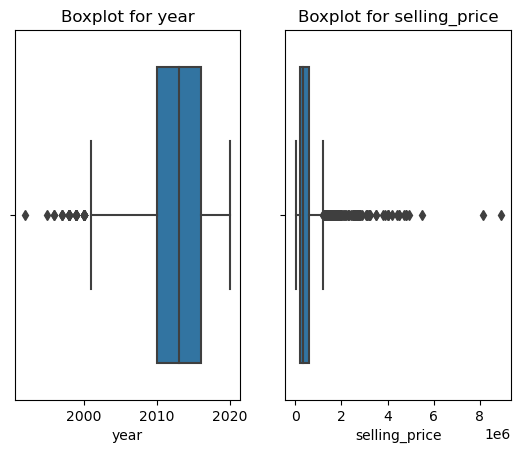

In [22]:
cols = ['year','selling_price']
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')
plt.show()

In [23]:
#Encoding categorical Features
cat_cols


Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [24]:
df['fuel'].value_counts()
#df.owner.unique()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

In [25]:
df['owner'].value_counts()

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

In [26]:
df['transmission'].value_counts()

Manual       3265
Automatic     312
Name: transmission, dtype: int64

In [27]:
df['seller_type'].value_counts()

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

In [28]:
df['name'].value_counts()

Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: name, Length: 1491, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
lb = LabelEncoder()
for i in ['transmission','owner','fuel']:
    df[i] = lb.fit_transform(df[i])

In [31]:
df.head()
#df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,Individual,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,Individual,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,Individual,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,1,2


In [32]:
#df_dum = pd.get_dummies(data=df,columns = cat_cols,drop_first=True)
#print(df_dum.shape)
#df_dum.columns

df_dum = pd.get_dummies(data=df,columns=['seller_type'])

print(df_dum.shape)
print(df_dum.columns)

(3577, 10)
Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer'],
      dtype='object')


In [33]:
df_dum

,name,year,selling_price,km_driven,fuel,transmission,owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti 800 AC,2007,60000,70000,4,1,0,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,0,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,0,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,2,0,1,0
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,2,0,1,0
4337,Maruti 800 AC BSIII,2009,110000,83000,4,1,2,0,1,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,0,0,1,0


In [34]:

#x = df_dum.drop('selling_price',axis=1)
#y = df_dum['selling_price']
#print(x.shape)
#print(y.shape)

In [35]:
counts=df['name'].value_counts()
counts

Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: name, Length: 1491, dtype: int64

In [36]:
df_dum['name'].nunique()
threshold=25

In [37]:
repl=counts[counts<=threshold].index
df2=pd.get_dummies(df_dum['name'].replace(repl,'uncomman'))

In [38]:
#df2
# Combine the one-hot encoded 'name' column back into the main DataFrame
df_dum1 = pd.concat([df_dum, df2], axis=1)
df_dum1
# Drop the original 'name' column, as it's no longer needed
df_dum1= df_dum1.drop('name', axis=1)
df_dum1

,year,selling_price,km_driven,fuel,transmission,owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,Hyundai EON Era Plus,Maruti Alto 800 LXI,Maruti Alto LX,Maruti Alto LXi,Maruti Swift Dzire VDI,Maruti Swift VDI BSIV,Maruti Wagon R VXI BS IV,uncomman
0,2007,60000,70000,4,1,0,0,1,0,0,0,0,0,0,0,0,1
1,2007,135000,50000,4,1,0,0,1,0,0,0,0,0,0,0,0,1
2,2012,600000,100000,1,1,0,0,1,0,0,0,0,0,0,0,0,1
3,2017,250000,46000,4,1,0,0,1,0,0,0,0,0,0,0,0,1
4,2014,450000,141000,1,1,2,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,1,1,2,0,1,0,0,0,0,0,0,0,0,1
4336,2014,409999,80000,1,1,2,0,1,0,0,0,0,0,0,0,0,1
4337,2009,110000,83000,4,1,2,0,1,0,0,0,0,0,0,0,0,1
4338,2016,865000,90000,1,1,0,0,1,0,0,0,0,0,0,0,0,1


In [39]:

x = df_dum1.drop('selling_price',axis=1)
y = df_dum1['selling_price']
print(x.shape)
print(y.shape)


(3577, 16)
(3577,)


In [40]:
#Split data into train and test
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2682, 16)
(895, 16)
(2682,)
(895,)


In [42]:
x_train.head()

,year,km_driven,fuel,transmission,owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,Hyundai EON Era Plus,Maruti Alto 800 LXI,Maruti Alto LX,Maruti Alto LXi,Maruti Swift Dzire VDI,Maruti Swift VDI BSIV,Maruti Wagon R VXI BS IV,uncomman
3816,2014,89126,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1254,2011,70000,1,1,0,0,1,0,0,0,0,0,0,0,0,1
1447,2015,80000,1,1,2,0,1,0,0,0,0,0,0,0,0,1
1954,2018,8000,4,1,0,0,1,0,0,0,0,0,0,0,0,1
1174,2007,120000,4,1,2,0,1,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.metrics import *

In [44]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train) 
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    data = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
          'Test_MSE':test_mse,'Test_RMSE':test_rmse}
    res = pd.DataFrame(data,index=[mname])
    return res

In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [46]:
lr1 = LinearRegression()
lr1_res = eval_model(lr1,x_train,y_train,x_test,y_test,'Lin_Reg')
lr1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.475163,0.332912,216406.872993,2.128333e+11,461338.593238


In [47]:
rid1 = Ridge(alpha=7)
rid1_res = eval_model(rid1,x_train,y_train,x_test,y_test,'Ridge')
rid1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Ridge,0.474862,0.333902,215912.445267,2.125174e+11,460996.130278


In [48]:
dt1 = DecisionTreeRegressor(max_depth=7,min_samples_split=15)
dt1_res = eval_model(dt1,x_train,y_train,x_test,y_test,'DT_Reg')
dt1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT_Reg,0.677444,0.369405,191634.906818,2.011902e+11,448542.344068


In [49]:
lasso1 = Lasso(alpha=20)
lasso1_res = eval_model(lasso1,x_train,y_train,x_test,y_test,'Lasso')
lasso1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lasso,0.475162,0.332942,216390.772247,2.128237e+11,461328.19376


In [50]:
rf1 = RandomForestRegressor(n_estimators=90,max_depth=7,min_samples_split=15,random_state=42)
# rf1 = RandomForestRegressor(n_estimators=100,max_depth=6,min_samples_split=8,random_state=42)
rf1_res = eval_model(rf1,x_train,y_train,x_test,y_test,'RF_Reg')
rf1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RF_Reg,0.696817,0.400187,182449.881862,1.913695e+11,437457.999453


In [51]:
bag1 = BaggingRegressor(n_estimators=50,max_features=x_train.shape[1],
                        max_samples=x_train.shape[0])
bag1_res = eval_model(bag1,x_train,y_train,x_test,y_test,'Bagging_Reg')
bag1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Bagging_Reg,0.890195,0.368149,194460.14273,2.015911e+11,448988.94156


In [52]:
adab1 = AdaBoostRegressor(n_estimators=100)
adab1_res = eval_model(adab1,x_train,y_train,x_test,y_test,'AdaBoost_Reg')
adab1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
AdaBoost_Reg,0.423339,0.239353,236738.031059,2.426834e+11,492629.019653


In [53]:
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1_res = eval_model(knn1,x_train,y_train,x_test,y_test,'KNN_Reg')
knn1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
KNN_Reg,0.441062,0.153691,247508.689609,2.700136e+11,519628.351283


In [54]:

res = pd.concat([lr1_res,rid1_res,lasso1_res,dt1_res,rf1_res,bag1_res,adab1_res,knn1_res])
res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.475163,0.332912,216406.872993,2.128333e+11,461338.593238
Ridge,0.474862,0.333902,215912.445267,2.125174e+11,460996.130278
Lasso,0.475162,0.332942,216390.772247,2.128237e+11,461328.193760
DT_Reg,0.677444,0.369405,191634.906818,2.011902e+11,448542.344068
RF_Reg,0.696817,0.400187,182449.881862,1.913695e+11,437457.999453
Bagging_Reg,0.890195,0.368149,194460.142730,2.015911e+11,448988.941560
AdaBoost_Reg,0.423339,0.239353,236738.031059,2.426834e+11,492629.019653
KNN_Reg,0.441062,0.153691,247508.689609,2.700136e+11,519628.351283


In [55]:
import pickle

In [56]:
pickle.dump(lr1,open('lr_model_8N.pkl','wb'))
pickle.dump(dt1,open('dt_model_8N.pkl','wb'))
pickle.dump(rf1,open('rf_model_8N.pkl','wb'))

In [57]:
df_dum1.head()

,year,selling_price,km_driven,fuel,transmission,owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,Hyundai EON Era Plus,Maruti Alto 800 LXI,Maruti Alto LX,Maruti Alto LXi,Maruti Swift Dzire VDI,Maruti Swift VDI BSIV,Maruti Wagon R VXI BS IV,uncomman
0,2007,60000,70000,4,1,0,0,1,0,0,0,0,0,0,0,0,1
1,2007,135000,50000,4,1,0,0,1,0,0,0,0,0,0,0,0,1
2,2012,600000,100000,1,1,0,0,1,0,0,0,0,0,0,0,0,1
3,2017,250000,46000,4,1,0,0,1,0,0,0,0,0,0,0,0,1
4,2014,450000,141000,1,1,2,0,1,0,0,0,0,0,0,0,0,1


In [87]:
df_dum1.describe()

,year,selling_price,km_driven,fuel,transmission,owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,Hyundai EON Era Plus,Maruti Alto 800 LXI,Maruti Alto LX,Maruti Alto LXi,Maruti Swift Dzire VDI,Maruti Swift VDI BSIV,Maruti Wagon R VXI BS IV,uncomman
count,3577.000000,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,2012.962538,4.739125e+05,69250.545709,2.442270,0.912776,0.905228,0.199049,0.791725,0.009226,0.007828,0.013419,0.008387,0.011742,0.015096,0.007828,0.007269,0.928432
std,4.251759,5.093018e+05,47579.940016,1.508582,0.282202,1.277152,0.399341,0.406131,0.095619,0.088140,0.115077,0.091208,0.107736,0.121954,0.088140,0.084958,0.257808
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,2.000000e+05,36000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2013.000000,3.500000e+05,60000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,6.000000e+05,90000.000000,4.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2020.000000,8.900000e+06,806599.000000,4.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df['fuel'].value_counts()

1    1800
4    1717
0      37
3      22
2       1
Name: fuel, dtype: int64

In [60]:
df_dum1['fuel'].value_counts()

1    1800
4    1717
0      37
3      22
2       1
Name: fuel, dtype: int64

In [61]:
df['owner'].value_counts()

0    2218
2     978
4     289
1      75
3      17
Name: owner, dtype: int64

In [62]:
df_dum1['owner'].value_counts()

0    2218
2     978
4     289
1      75
3      17
Name: owner, dtype: int64

In [63]:
df['transmission'].value_counts()

1    3265
0     312
Name: transmission, dtype: int64

In [64]:
df_dum1['transmission'].value_counts()

1    3265
0     312
Name: transmission, dtype: int64